### ACHU S VIJAYAN

### TCS INTERNSHIP

# HR SALARY PREDICTION DASHBOARD

**Problem Statement**

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several ML classification techniques.

### Loading the dataset into Python enviornment

In [1]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from collections import Counter
def printmd(string):
    display(Markdown(string))


# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv('salarydata.csv')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [5]:
data.shape

(32561, 14)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  14
Number of rows in the dataset:  32561
Total number of datapoints in the dataset: 455854
Count of Numerical Features: 5
Count of Categorical Features: 9


In [8]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [9]:
unique_checker(data) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in age feature.
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

****************************************
Unique values in workclass feature.
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in education feature.
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

****************************************
Unique values in education-num feature.
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

****************************************
Unique values in marital-status feature.
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separat

In [10]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [11]:
count_checker(data) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in age feature.
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

****************************************
Count for each category of values in workclass feature.
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

****************************************
Count for each category of values in education feature.
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool   

**Findings**

- The dataset contains 48,842 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

1. Age: Discrete (from 17 to 90)
2. Work class (Private, Federal-Government, etc): Nominal (9 categories)
3. Final Weight (the number of people the census believes the entry represents): Discrete
4. Education (the highest level of education obtained): Ordinal (16 categories)
5. Education Number (the number of years of education): Discrete (from 1 to 16)
6. Marital Status: Nominal (7 categories)
7. Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
8. Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
9. Race: Nominal (5 categories)
10. Sex: Nominal (2 categories)
11. Capital Gain: Continous
12. Capital Loss: Continous
13. Hours (worked) per week: Discrete (from 1 to 99)
14. Native Country: Nominal (42 countries)
15. Salary (whether or not an individual makes more than 50,000 dollar annually):     Boolean (≤50k, >50k)

In [12]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

### Renaming the columns

In [13]:

#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'native-country': 'country','hours-per-week': 'hours_per_week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### Data Cleaning

### 1. Missing Values

In [14]:
 #check the missing value
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [15]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

**Findings**

- we see that there is a special character as " ?" for columns workcalss, Occupation, and country, we need to clean those data. 
- In this case, as the missing value fall into the categorical features, we will use the pandas DataFrame mode() method to fill the missing value.

In [16]:
#Handling missing values
# the code will replace the special character to nan  
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)



In [17]:

df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

In [18]:
#we will use the pandas DataFrame mode() method to fill the missing value.
df = df.fillna(df.mode().iloc[0])

In [19]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

### 2. Remove duplicate data 

In [20]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

3591

In [21]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [22]:
df.shape

(28970, 14)

In [23]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### 3. Handling Outliers

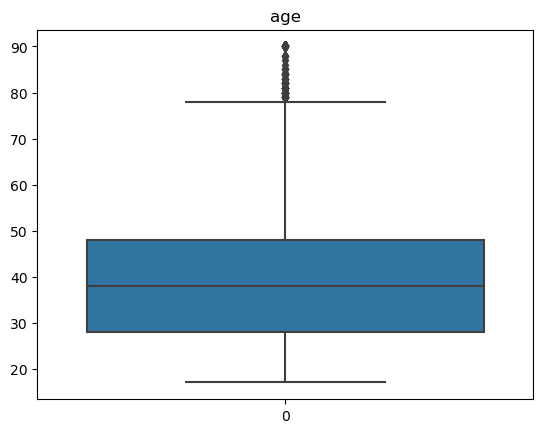

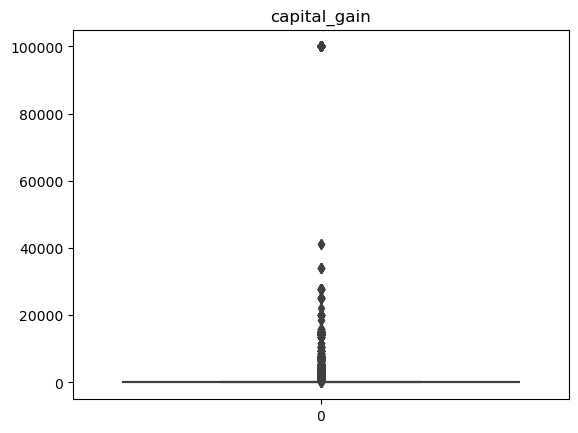

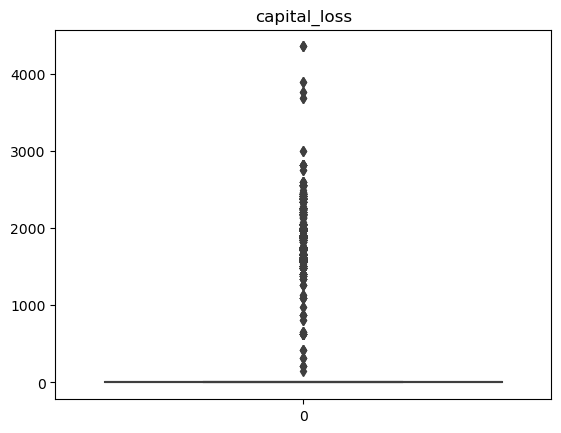

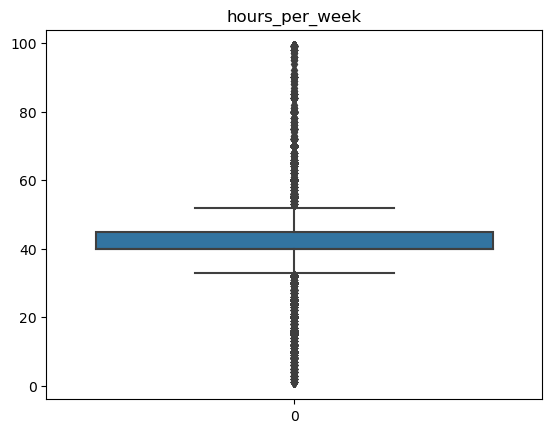

In [24]:
## checking outliers
for i in ['age',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


In [25]:
#df1=df
#df1.head()

### Handling Outliers with age

In [26]:
q1 = np.percentile(df['age'],25,interpolation='midpoint')
q3 = np.percentile(df['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['age'][(df['age']<low_limit)|(df['age']>high_limit)].index
df.drop(index,inplace=True)

### Handling Outliers with capital_gain

In [27]:
q1 = np.percentile(df['hours_per_week'],25,interpolation='midpoint')
q3 = np.percentile(df['hours_per_week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['hours_per_week'][(df['hours_per_week']<low_limit)|(df['hours_per_week']>high_limit)].index
df.drop(index,inplace=True)

### 5. Exploratory Data analysis

#### Check descriptive statistics - Numerical columns

In [28]:
df.describe()

,age,education-num,capital_gain,capital_loss,hours_per_week
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,39.333838,10.119797,1127.431845,100.393443,41.673441
std,12.211260,2.627231,7149.224082,428.671634,4.145915
min,17.000000,1.000000,0.000000,0.000000,33.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,44.000000
max,78.000000,16.000000,99999.000000,4356.000000,52.000000


#### Check descriptive statistics - Categorical columns

In [29]:
df.describe(exclude='number')

,workclass,education,marital,occupation,relationship,race,sex,country,salary
count,20468,20468,20468,20468,20468,20468,20468,20468,20468
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,15047,6447,9623,3529,8397,16960,13792,18372,15092


### 6. Feature Reduction 

- While analyzing the dataset, 
- As we can see in 'descriptive statistics - Numerical columns',
    - 'capital-gain'and 'capital-loss' both columns have 75% data as 0.00
            - So, we can drop 'capital-gain'& 'capital-loss' both columns. 
- The column,education-num is the numerical version of the column education, so we also drop it.

In [30]:
df.drop(['capital_gain','capital_loss','education-num'], axis = 1,inplace = True)
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [31]:
df.shape

(20468, 11)

Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [32]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [33]:
df['marital'].value_counts()

married        9946
not married    7246
divorced       3276
Name: marital, dtype: int64

Before we do further analysis, we will separate the data as numeric and categorical so that our analysis becomes easy.

In [34]:
# NUMERIC FEATURES:

numeric_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns 

print('Numeric Features: ')
print(numeric_data.head(5))
print('----'*20)

Numeric Features: 
   age  hours_per_week
0   39              40
2   38              40
3   53              40
4   28              40
5   37              40
--------------------------------------------------------------------------------


In [35]:

# CATEGORICAL FEATURES:

categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

print('Categorical Features: ')
print(categorical_data.head(5))
print('----'*20)

Categorical Features: 
   workclass  education      marital         occupation   relationship   race  \
0  State-gov  Bachelors  not married       Adm-clerical  Not-in-family  White   
2    Private    HS-grad     divorced  Handlers-cleaners  Not-in-family  White   
3    Private       11th      married  Handlers-cleaners        Husband  Black   
4    Private  Bachelors      married     Prof-specialty           Wife  Black   
5    Private    Masters      married    Exec-managerial           Wife  White   

      sex        country salary  
0    Male  United-States  <=50K  
2    Male  United-States  <=50K  
3    Male  United-States  <=50K  
4  Female           Cuba  <=50K  
5  Female  United-States  <=50K  
--------------------------------------------------------------------------------


### 7. Data visualization

### Univariate Analysis

#### NUMERIC DATA:

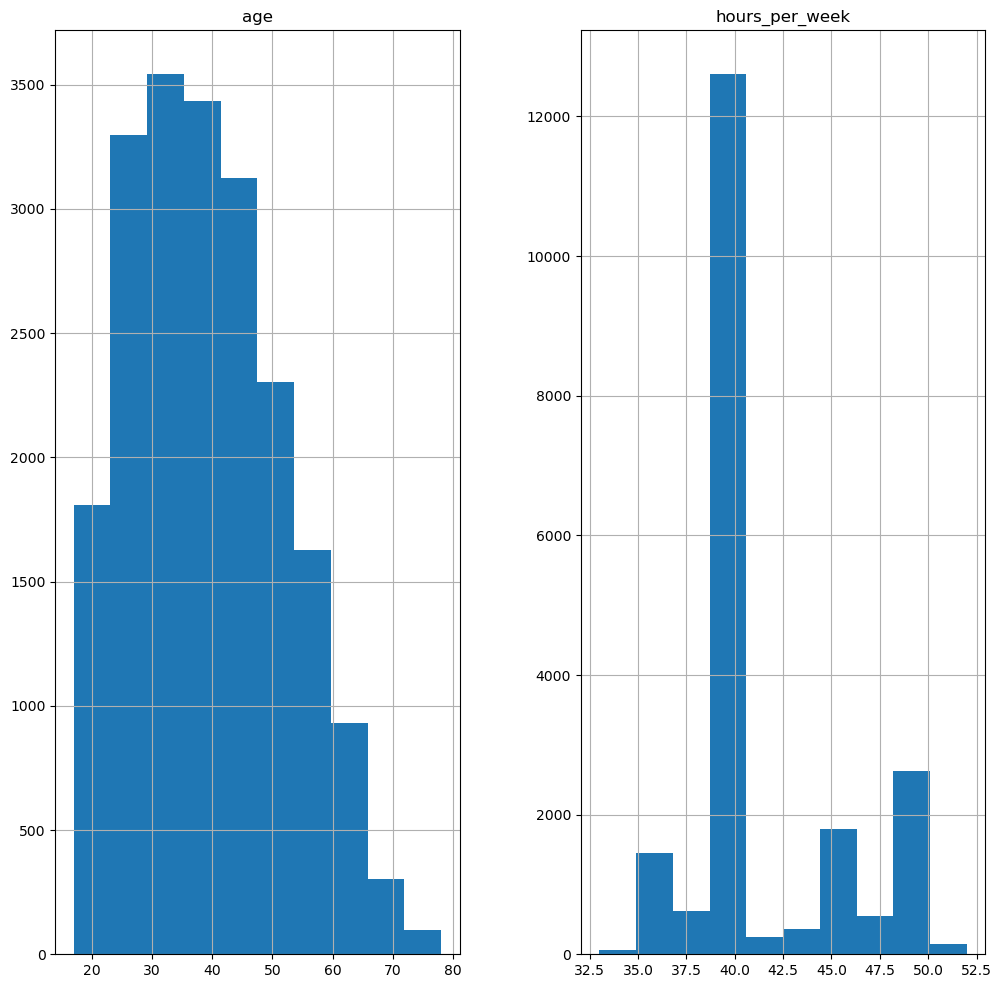

In [36]:
# let's see how data is distributed for every column
df.hist(figsize=(12,12), sharex=False);

**Findings**
- The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40
- The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

### CATEGORICAL DATA:

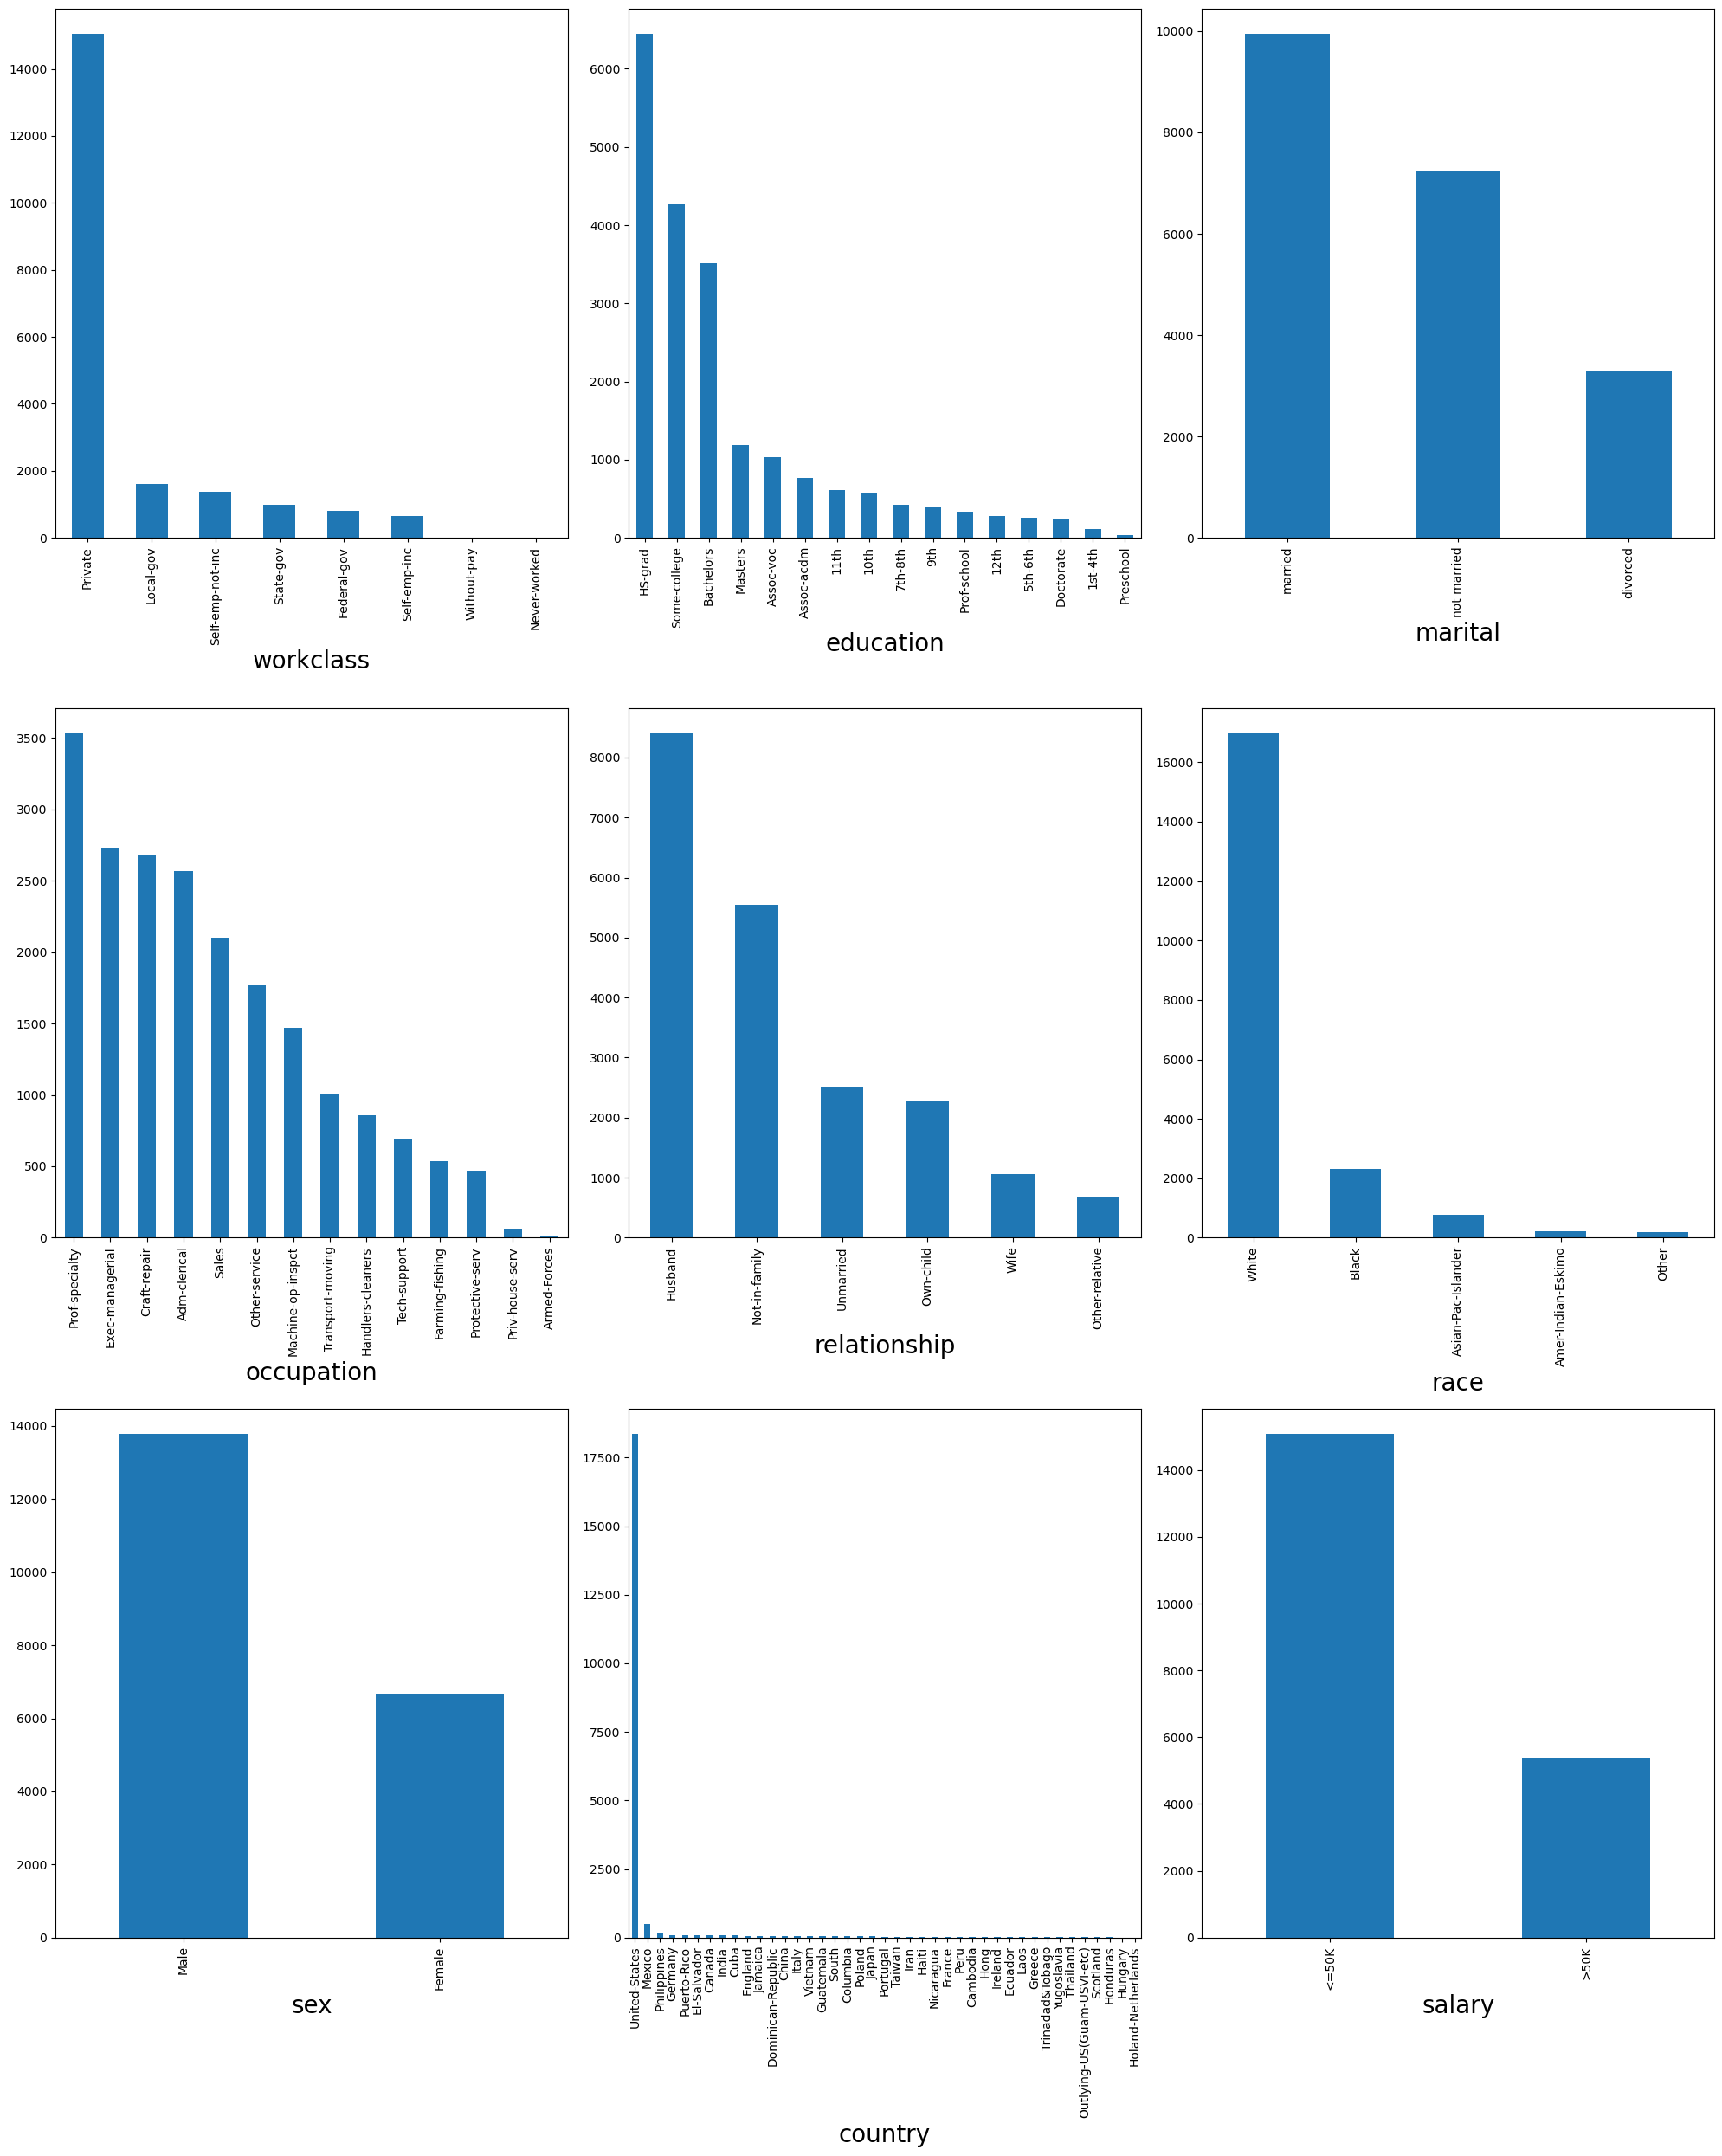

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Findings**
- if we look at the workclass variable variable we can see that 74% people are privately employed, 26% belong to other 7 categories.
- Looking at the education, majority of people have completed high graduation, have attended college or have atleast completed masters.
- Considering the marital status, 50% are married and 35% are never married.
- The occupation variable is equally distributed among various occupations.
- If we consider the race variable, 92% are white and 8% belong to 4 other races.
- 72% of the people in the data are male.
- 96% of the people belong to US, 4% elong to remaining countries.
- 25% people have salary above 50k and 75% below 50k, this indicated that we have imbalanced data.

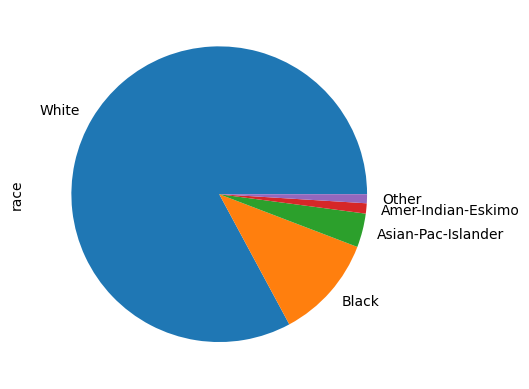

In [38]:
#Checking race

df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

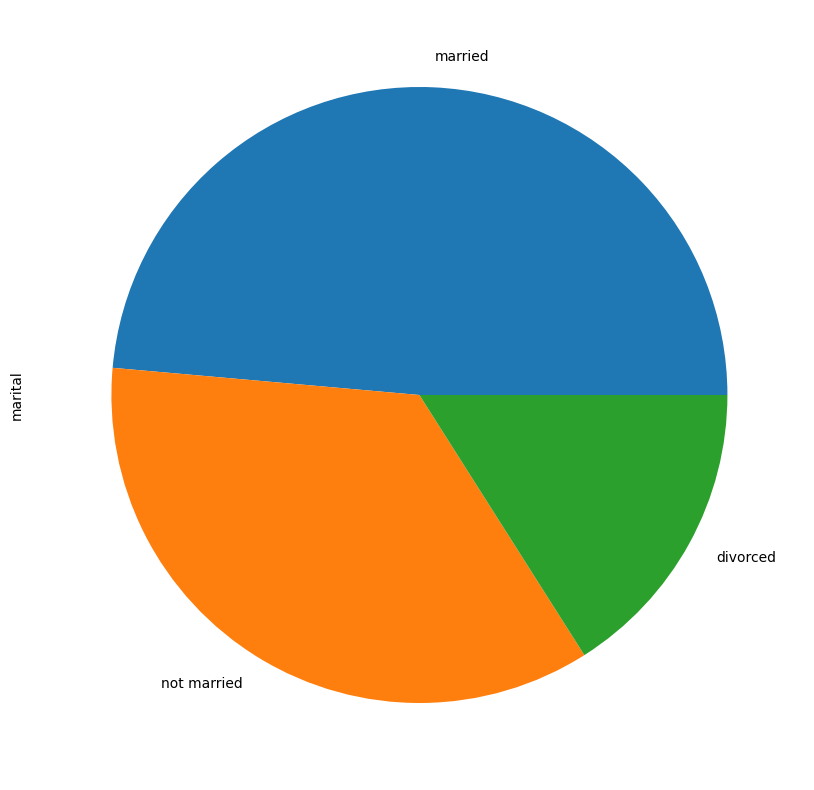

In [39]:
#checking marital-status

df['marital'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

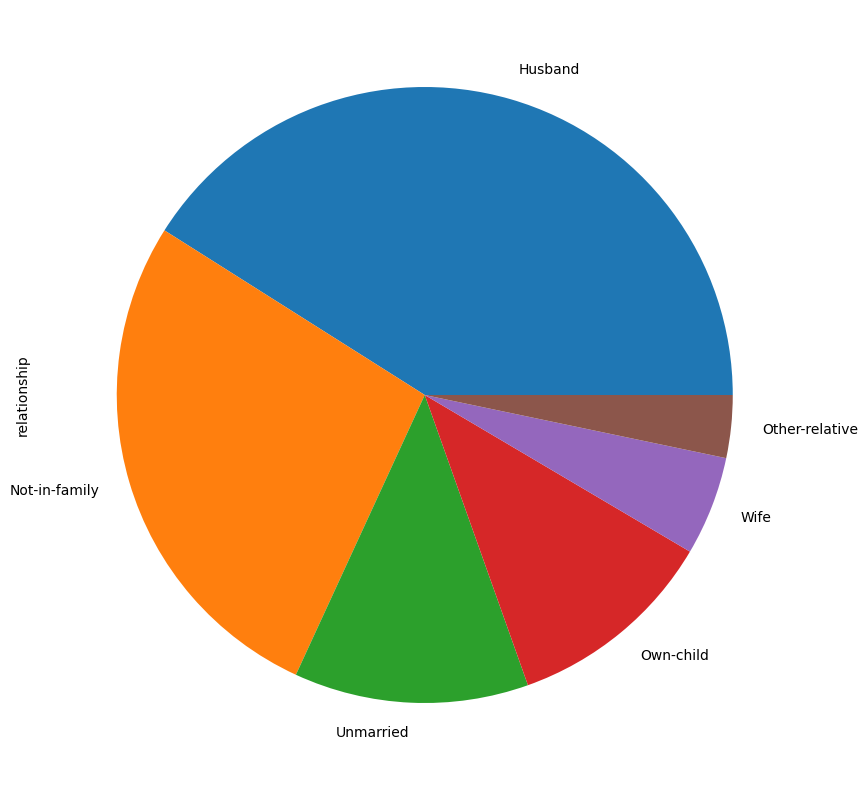

In [40]:
#checking relationship

df['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

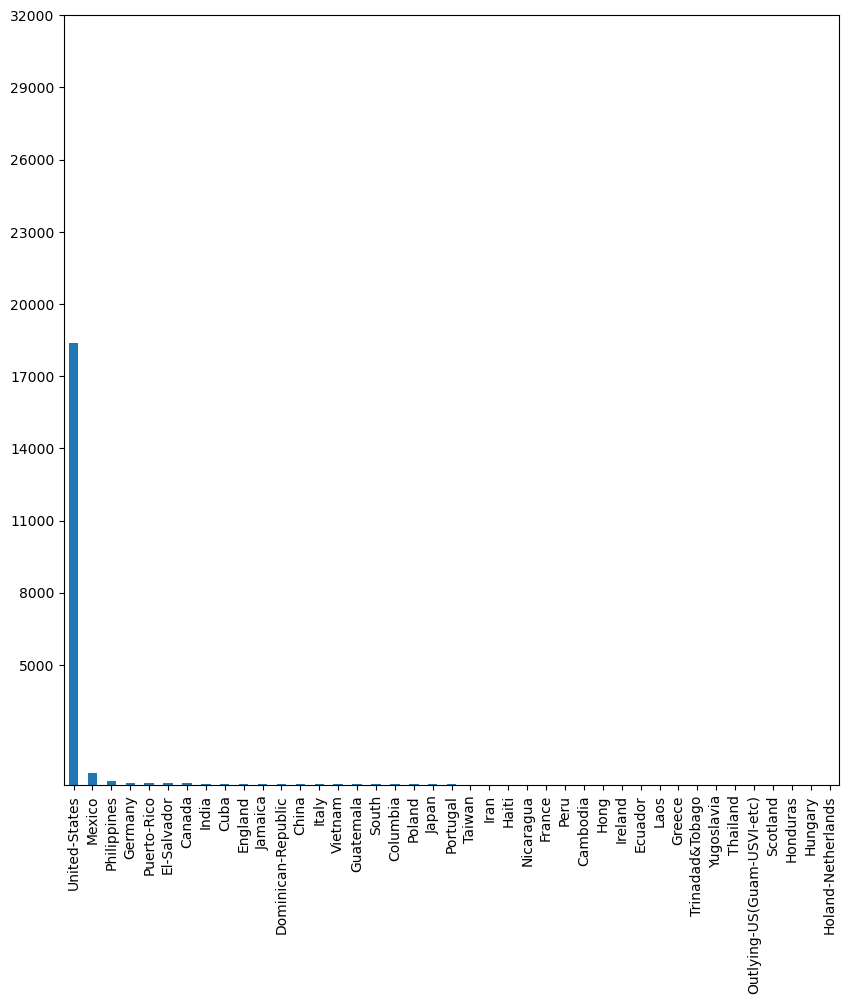

In [41]:
#checking native-country

df['country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

### BI-VARIATE ANALYSIS:

Plot numeric variable againts the salary variable 

In [42]:
# Plotting income vs age
#sns.catplot(x="Salary", y= "age", kind="box", data=df1)

In [43]:

# Plotting Salary vs fnlwgt
#sns.catplot(x="Salary", y= "fnlwgt", kind="box", data=df1)

In [44]:
# Plotting Salary vs hours_per_week
#sns.catplot(x="Salary", y= "hours_per_week", kind="box", data=df1)

**Findings**
- fnlwgt variable has no difference whether the income is above 50k or below 50k.
- age and hours-per-week variables have have some variation in distribution wrt whether the income is above 50k or below 50k.

In [45]:

#for column in categorical_data:
    #plt.figure(figsize=(20,4))
    #plt.subplot(121)
    #sns.countplot(x=categorical_data[column],hue=categorical_data['Salary'],data=categorical_data)
    #plt.title(column)    
    #plt.xticks(rotation=90)

**Findings**

People who are having income more than 50k are:

- From the workclass, who are privately employed, also self employed individuals.
- If you consider quality of info, then, masters and bachelors, also, High school and college grads.
- From marital status, people who are married.
- Individuals who's occupation are exec-managerial or having professional speciality.
- Individuals, who are husbands.
- White people.
- Male individuals.
- people living in the United states.

In [46]:
df.corr()

,age,hours_per_week
age,1.000000,0.036539
hours_per_week,0.036539,1.000000


## 8. Feature Engineering

In [47]:
# education Category
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [48]:
# Salary
df.Salary = df.salary.replace('<=50K', 0)
df.Salary = df.salary.replace('>50K', 1)

In [49]:
df.corr()

,age,hours_per_week
age,1.000000,0.036539
hours_per_week,0.036539,1.000000


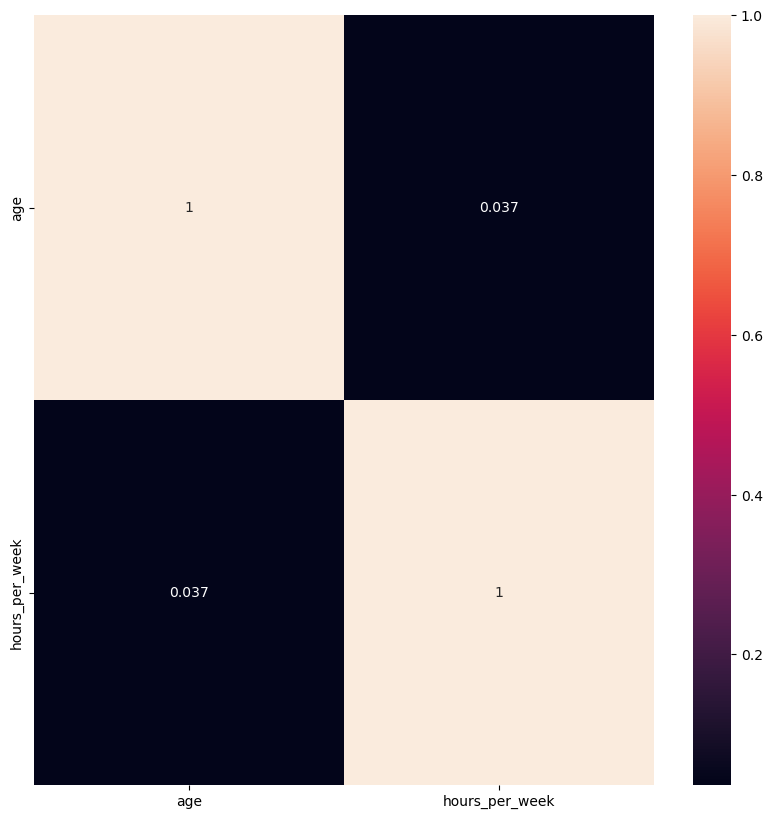

In [50]:
sns.heatmap(df.corr(), annot=True);

In [51]:
# Salary
df.Salary = df.Salary.replace( 0,'<=50K')
df.Salary = df.Salary.replace( 1,'>50K')

In [52]:
df['salary'].value_counts()

<=50K    15092
>50K      5376
Name: salary, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20468 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20468 non-null  int64 
 1   workclass       20468 non-null  object
 2   education       20468 non-null  object
 3   marital         20468 non-null  object
 4   occupation      20468 non-null  object
 5   relationship    20468 non-null  object
 6   race            20468 non-null  object
 7   sex             20468 non-null  object
 8   hours_per_week  20468 non-null  int64 
 9   country         20468 non-null  object
 10  salary          20468 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.9+ MB


In [54]:
#Covert workclass Columns Datatype To Category Datatype
df['workclass'] = df['workclass'].astype('category')

 I chose not to use the 'Fnlwgt' attribute that is used by the census, as the inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups. This attribute does not convey individual related meaning.

## 9. Encoding

In [55]:
df.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [56]:
unique_checker(df)

Unique values in age feature.
[39 38 53 28 37 52 31 42 30 32 40 34 25 43 35 59 56 23 20 45 48 24 49 57
 44 41 29 27 33 76 47 36 22 19 46 61 70 64 21 51 26 58 60 54 50 66 65 55
 77 63 17 62 67 72 69 18 73 71 78 75 68 74] 

****************************************
Unique values in workclass feature.
['State-gov', 'Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 

****************************************
Unique values in education feature.
['undergrad' 'high school' 'school' 'grad' 'higher' 'doc'] 

****************************************
Unique values in marital feature.
['not married' 'divorced' 'married'] 

****************************************
Unique values in occupation feature.
['Adm-clerical' 'Handlers-cleaners' 'Prof-specialty' 'Exec-managerial'
 'Sales' 'Craft-repair' 'Transport

### One-Hot Encoding

In [57]:
#Select the variables to be one-hot encoded
#one_hot_features = ['marital','sex']
#df1 = pd.get_dummies(df1, columns=one_hot_features)

In [58]:
#df1.head()

### Label Encoding

In [59]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df['workclass']  = le.fit_transform(df['workclass'])
df['education']  = le.fit_transform(df['education'])
df['occupation']  = le.fit_transform(df['occupation'])
df['relationship']  = le.fit_transform(df['relationship'])
df['race']  = le.fit_transform(df['race'])
df['country']  = le.fit_transform(df['country'])
df['marital']  = le.fit_transform(df['marital'])
df['sex']  = le.fit_transform(df['sex'])

In [60]:
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,6,5,2,0,1,4,1,40,38,<=50K
2,38,3,2,0,5,1,4,1,40,38,<=50K
3,53,3,4,1,5,0,2,1,40,38,<=50K
4,28,3,5,1,9,5,2,0,40,4,<=50K
5,37,3,1,1,3,5,4,0,40,38,<=50K


## 9. Model Development & Classification

In [61]:
#Moved the salary column to another variable
target_salary = df.pop('salary')
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38


### Logistic Regression Model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [63]:
#since this is a binary classification we will use logistic reg

#normalizing data
scaler = StandardScaler()
df2 = scaler.fit_transform(df.values)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df2, target_salary,test_size=0.2, random_state=42)

clf = LogisticRegression().fit(x_train,y_train)
clf

LogisticRegression()

In [65]:
clf.score(x_test,y_test)

0.7447484123106985

In [66]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.77      0.94      0.84      3021
        >50K       0.53      0.20      0.30      1073

    accuracy                           0.74      4094
   macro avg       0.65      0.57      0.57      4094
weighted avg       0.71      0.74      0.70      4094



In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,clf.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,clf.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,clf.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,clf.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.7447
Precision for Logistic Regression is 0.6512
Recall for Logistic Regression is 0.5704
F1-Score for Logistic Regression is 0.5697


In [68]:
y_pred1 = clf.predict(x_test)

Text(95.72222222222221, 0.5, 'Actual Labels')

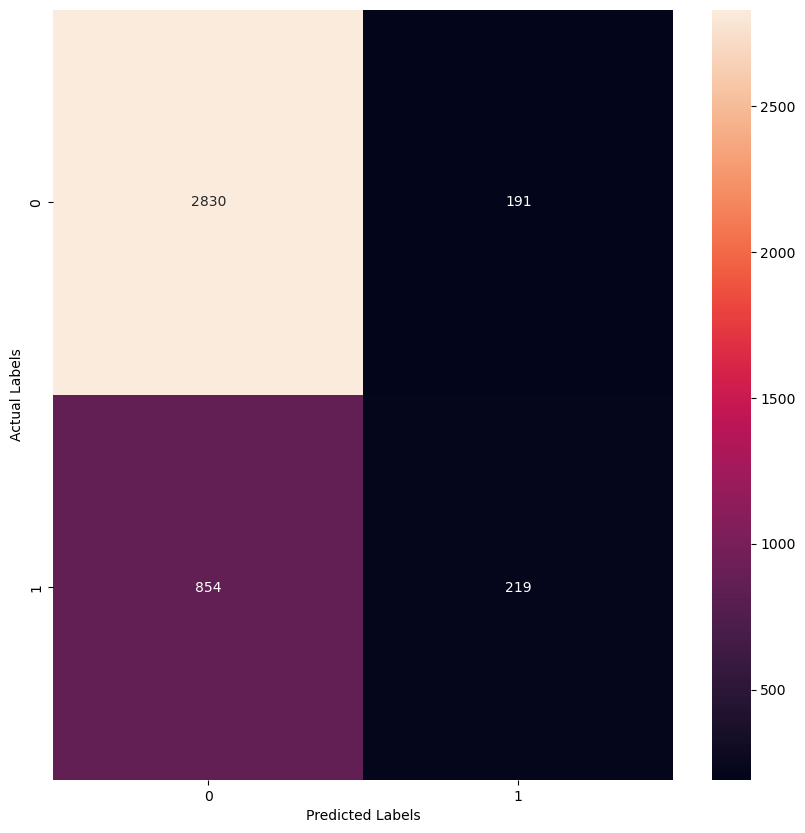

In [69]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

### Support Vector Classifier

In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.7372053255160621
Accuracy is: 0.7379091353199805
Precision is: 0.5445098919886812
Recall is: 0.7379091353199805
f1 score is: 0.6266264224319497
              precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85      3021
        >50K       0.00      0.00      0.00      1073

    accuracy                           0.74      4094
   macro avg       0.37      0.50      0.42      4094
weighted avg       0.54      0.74      0.63      4094

[[3021    0]
 [1073    0]]


### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7481680508060576
Precision is: 0.7438109009663066
Recall is: 0.7481680508060576
f1 score is: 0.7458260516349492
              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      3021
        >50K       0.52      0.49      0.51      1073

    accuracy                           0.75      4094
   macro avg       0.67      0.67      0.67      4094
weighted avg       0.74      0.75      0.75      4094

[[2535  486]
 [ 545  528]]


### KNN Model

In [72]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

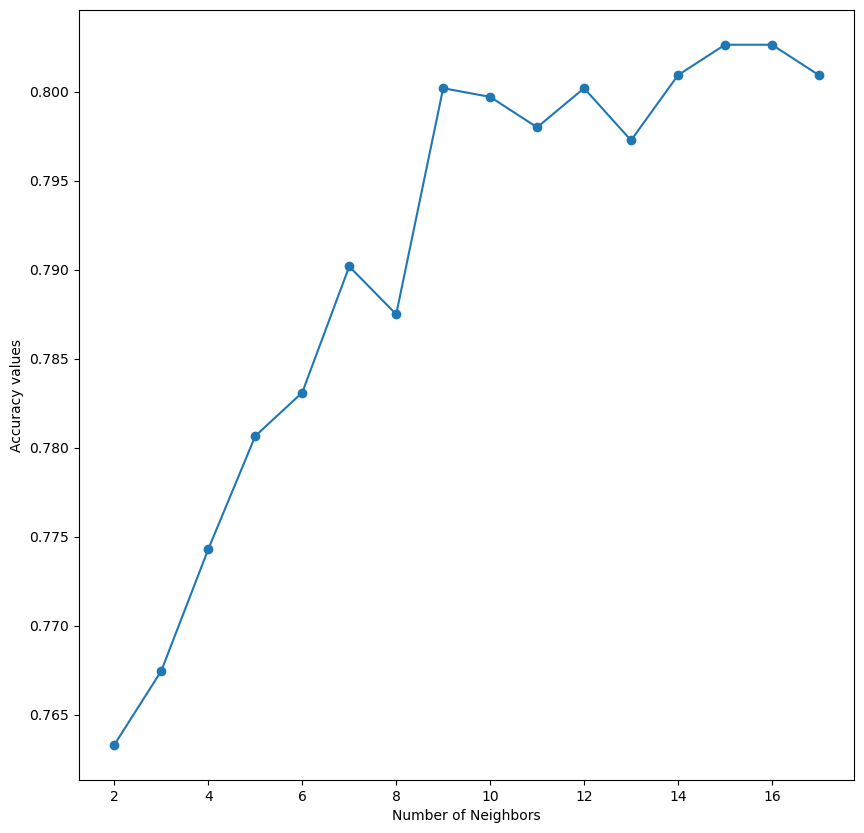

In [73]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [74]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.835287651154269
Accuracy is: 0.790180752320469
Precision is: 0.7816159762148495
Recall is: 0.790180752320469
f1 score is: 0.7845568125804867
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.62      0.53      0.57      1073

    accuracy                           0.79      4094
   macro avg       0.73      0.71      0.71      4094
weighted avg       0.78      0.79      0.78      4094

[[2670  351]
 [ 508  565]]


### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9600586295346281
Accuracy is: 0.7843185148998535
Precision is: 0.7752995256975304
Recall is: 0.7843185148998535
f1 score is: 0.7784542318148521
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.60      0.51      0.56      1073

    accuracy                           0.78      4094
   macro avg       0.72      0.70      0.71      4094
weighted avg       0.78      0.78      0.78      4094

[[2659  362]
 [ 521  552]]


# Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9600586295346281
Accuracy is: 0.8229115779189057
Precision is: 0.815303298284436
Recall is: 0.8229115779189057
f1 score is: 0.816757586785598
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3021
        >50K       0.70      0.57      0.63      1073

    accuracy                           0.82      4094
   macro avg       0.78      0.74      0.76      4094
weighted avg       0.82      0.82      0.82      4094

[[2757  264]
 [ 461  612]]


### Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9600586295346281
Accuracy is: 0.7410845139228138
Precision is: 0.762952711513866
Recall is: 0.7410845139228138
f1 score is: 0.7491540193603919
              precision    recall  f1-score   support

       <=50K       0.85      0.78      0.82      3021
        >50K       0.50      0.63      0.56      1073

    accuracy                           0.74      4094
   macro avg       0.68      0.70      0.69      4094
weighted avg       0.76      0.74      0.75      4094

[[2363  658]
 [ 402  671]]


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8194919394235467

**As seen in the  graph, there is a class imbalance problem. Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples.**

## Sampling

In [79]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
oversample=SMOTE()
x,y=oversample.fit_resample(df,target_salary)
counter=Counter(y)
print(counter)

Counter({'<=50K': 15092, '>50K': 15092})


<BarContainer object of 2 artists>

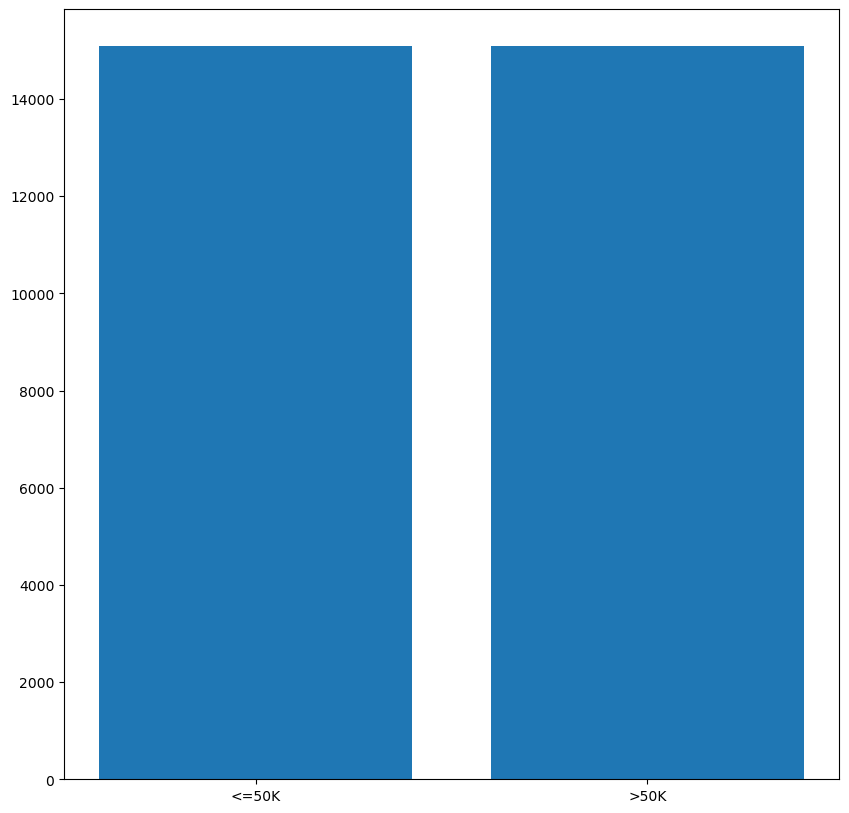

In [82]:
plt.bar(counter.keys(),counter.values())

In [83]:
#Standardisation
scale=StandardScaler()
X=scale.fit_transform(x)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% training and 20% test

## Logistic Regression

In [85]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)


0.6965380155706477

## SVM

In [86]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7008738145525324
Accuracy is: 0.7086301142951797
Precision is: 0.7210595131742691
Recall is: 0.7086301142951797
f1 score is: 0.7035922953714049
              precision    recall  f1-score   support

       <=50K       0.77      0.58      0.66      2974
        >50K       0.67      0.83      0.74      3063

    accuracy                           0.71      6037
   macro avg       0.72      0.71      0.70      6037
weighted avg       0.72      0.71      0.70      6037

[[1723 1251]
 [ 508 2555]]


### Decision Tree Classifier

In [87]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7008738145525324
Accuracy is: 0.7964220639390426
Precision is: 0.7966216467539484
Recall is: 0.7964220639390426
f1 score is: 0.7963243326988618
              precision    recall  f1-score   support

       <=50K       0.80      0.78      0.79      2974
        >50K       0.79      0.81      0.80      3063

    accuracy                           0.80      6037
   macro avg       0.80      0.80      0.80      6037
weighted avg       0.80      0.80      0.80      6037

[[2312  662]
 [ 567 2496]]


## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

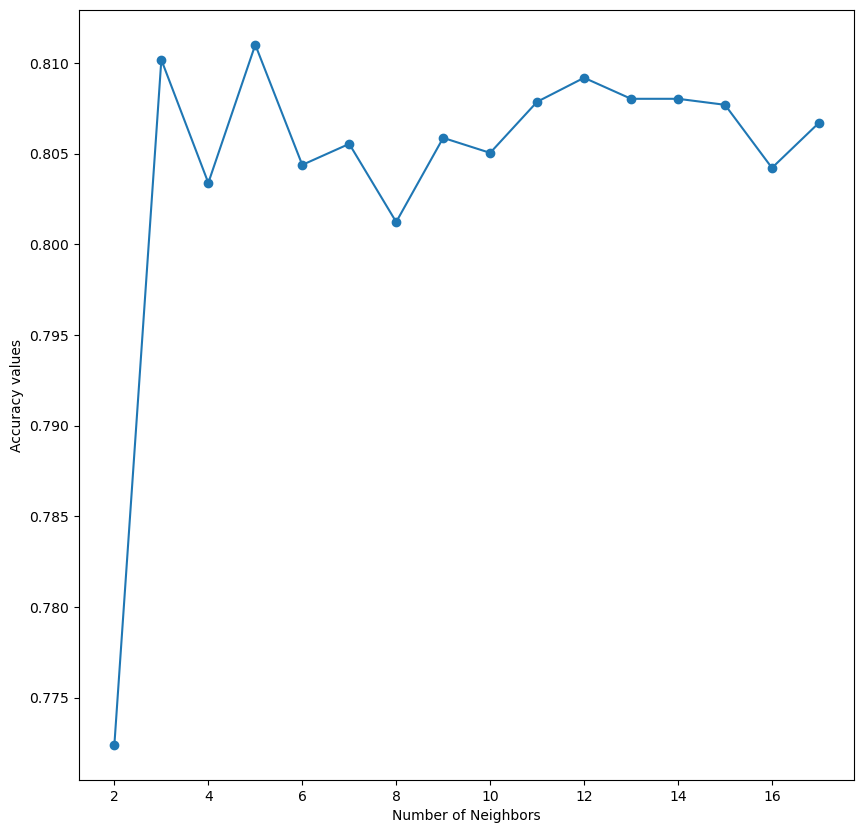

In [89]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [90]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.8882262806973952
Accuracy is: 0.8101706145436475
Precision is: 0.8117122050531993
Recall is: 0.8101706145436475
f1 score is: 0.8097988019532765
              precision    recall  f1-score   support

       <=50K       0.83      0.77      0.80      2974
        >50K       0.79      0.85      0.82      3063

    accuracy                           0.81      6037
   macro avg       0.81      0.81      0.81      6037
weighted avg       0.81      0.81      0.81      6037

[[2288  686]
 [ 460 2603]]


## RANDOM FOREST

In [91]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9634323104319377
Accuracy is: 0.8389928772569157
Precision is: 0.8396942996137875
Recall is: 0.8389928772569157
f1 score is: 0.8388376804997092
              precision    recall  f1-score   support

       <=50K       0.85      0.81      0.83      2974
        >50K       0.83      0.87      0.85      3063

    accuracy                           0.84      6037
   macro avg       0.84      0.84      0.84      6037
weighted avg       0.84      0.84      0.84      6037

[[2414  560]
 [ 412 2651]]


## GRADIENT BOOSTING

In [92]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9634323104319377
Accuracy is: 0.8229252940202088
Precision is: 0.8248923120609164
Recall is: 0.8229252940202088
f1 score is: 0.8225208133233215
              precision    recall  f1-score   support

       <=50K       0.85      0.78      0.81      2974
        >50K       0.80      0.87      0.83      3063

    accuracy                           0.82      6037
   macro avg       0.83      0.82      0.82      6037
weighted avg       0.82      0.82      0.82      6037

[[2316  658]
 [ 411 2652]]


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8146430346198443

## Model prediction Accuracy table

In [94]:
from tabulate import tabulate

In [95]:
table = [['Model', 'Accuracy'], ['Logistic Regression',79.61], ['KNN',84.62],['Decision tree',84.22],['Random Forest',86.46],['Gradient Boost',83.198],['SVM',79.8]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │     79.61  │
├─────────────────────┼────────────┤
│ KNN                 │     84.62  │
├─────────────────────┼────────────┤
│ Decision tree       │     84.22  │
├─────────────────────┼────────────┤
│ Random Forest       │     86.46  │
├─────────────────────┼────────────┤
│ Gradient Boost      │     83.198 │
├─────────────────────┼────────────┤
│ SVM                 │     79.8   │
╘═════════════════════╧════════════╛


In [96]:
df

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32555,22,3,3,2,10,1,4,1,40,38
32556,27,3,3,1,12,5,4,0,38,38
32557,40,3,2,1,6,0,4,1,40,38
32558,58,3,2,2,0,4,4,0,40,38


In [97]:
# save the model
import pickle
filename = 'model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [98]:
load_model = pickle.load(open(filename,'rb'))

In [99]:
load_model.predict([[52,4,11,2,3,5,4,0,40,38]])

array(['>50K'], dtype=object)